In [34]:
import pandas as pd
import numpy as np

In [35]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [36]:
df = pd.read_csv("C:/Users/H/Documents/agroclimatic_clusters.txt", sep=',', header=None, names=names, index_col=False, engine='python')

In [37]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [38]:
df['state'].value_counts()

uttar pradesh             52080
madhya pradesh            35712
bihar                     27528
maharashtra               25296
rajasthan                 23808
orissa                    22320
tamil nadu                22320
karnataka                 20088
gujarat                   18600
assam                     17112
andhra pradesh            17112
jharkhand                 16368
haryana                   14136
west bengal               14136
punjab                    12648
chhattisgarh              11904
arunachal pradesh         11160
kerala                    10416
jammu and kashmir         10416
uttaranchal                9672
himachal pradesh           8928
manipur                    6696
nagaland                   5952
mizoram                    5952
meghalaya                  5208
puducherry                 2976
tripura                    2976
sikkim                     2976
goa                        1488
daman and diu              1488
andaman and nicobar        1488
chandiga

In [39]:
a = []
for i in range(len(df)):
    if df['state'][i]!='uttar pradesh':
        a.append(i)

In [40]:
df = df.drop(a)

In [41]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
3720,1958,1,27,23.1,10.2,43,0.5,uttar pradesh,ballia,5,5,11,11,1,21,7,32
3721,1958,2,5,25.2,10.4,39,0.2,uttar pradesh,ballia,5,5,11,11,1,21,7,32
3722,1958,3,9,32.1,16.4,28,-0.3,uttar pradesh,ballia,5,5,11,11,1,21,7,32
3723,1958,4,1,39.3,23.2,11,-0.5,uttar pradesh,ballia,5,5,11,11,1,21,7,32
3724,1958,5,2,41.0,26.2,8,-0.9,uttar pradesh,ballia,5,5,11,11,1,21,7,32


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52080 entries, 3720 to 432263
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            52080 non-null  int64  
 1   Month           52080 non-null  int64  
 2   ppt(mm)         52080 non-null  int64  
 3   tmax(degC)      52080 non-null  float64
 4   tmin(degC)      52080 non-null  float64
 5   aet(mm)         52080 non-null  int64  
 6   PDSI(unitless)  52080 non-null  float64
 7   state           52080 non-null  object 
 8   district        52080 non-null  object 
 9   cluster14       52080 non-null  int64  
 10  cluster15       52080 non-null  int64  
 11  cluster18       52080 non-null  int64  
 12  cluster20       52080 non-null  int64  
 13  cluster25       52080 non-null  int64  
 14  cluster27       52080 non-null  int64  
 15  cluster30       52080 non-null  int64  
 16  cluster35       52080 non-null  int64  
dtypes: float64(3), int64(12), o

In [43]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(52080, 8)

In [44]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [45]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
3720,1958,1,27,23.1,10.2,43,0.5,ballia,1-1958
3721,1958,2,5,25.2,10.4,39,0.2,ballia,2-1958
3722,1958,3,9,32.1,16.4,28,-0.3,ballia,3-1958
3723,1958,4,1,39.3,23.2,11,-0.5,ballia,4-1958
3724,1958,5,2,41.0,26.2,8,-0.9,ballia,5-1958


In [46]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
3720,1958,1,27,23.1,10.2,43,0.5,ballia,1958-01-01,1
3721,1958,2,5,25.2,10.4,39,0.2,ballia,1958-02-01,1
3722,1958,3,9,32.1,16.4,28,-0.3,ballia,1958-03-01,1
3723,1958,4,1,39.3,23.2,11,-0.5,ballia,1958-04-01,1
3724,1958,5,2,41.0,26.2,8,-0.9,ballia,1958-05-01,1


In [83]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

KeyError: 'tmax(degC)'

In [84]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
432259,2019,8,373,122,1.4,kaushambi,2019-08-01,1,30.10
432260,2019,9,312,103,3.2,kaushambi,2019-09-01,1,28.95
432261,2019,10,30,76,3.2,kaushambi,2019-10-01,1,26.80
432262,2019,11,0,44,3.1,kaushambi,2019-11-01,1,22.90
432263,2019,12,19,34,3.5,kaushambi,2019-12-01,1,15.75


In [49]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,ppt(mm),y,aet(mm),district
0,1981-01-01,28,14.95,36,ballia
1,1981-02-01,6,18.80,31,ballia
2,1981-03-01,38,22.50,49,ballia
3,1981-04-01,2,29.65,9,ballia
4,1981-05-01,15,32.70,19,ballia


In [50]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
4452,2019,1,30,35,-0.9,ballia,2019-01-01,1,14.55
4453,2019,2,36,41,1.1,ballia,2019-02-01,1,16.80
4454,2019,3,7,23,0.8,ballia,2019-03-01,1,22.05
4455,2019,4,9,18,1.2,ballia,2019-04-01,1,29.45
4456,2019,5,3,9,0.6,ballia,2019-05-01,1,32.85
...,...,...,...,...,...,...,...,...,...
432259,2019,8,373,122,1.4,kaushambi,2019-08-01,1,30.10
432260,2019,9,312,103,3.2,kaushambi,2019-09-01,1,28.95
432261,2019,10,30,76,3.2,kaushambi,2019-10-01,1,26.80
432262,2019,11,0,44,3.1,kaushambi,2019-11-01,1,22.90


In [51]:
from fbprophet import Prophet

In [52]:
model = Prophet()

In [53]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
train.rename(columns = {'date':'ds'}, inplace = True)

In [93]:
p = conditions[['mid_temp','Year']]

In [94]:
p

,mid_temp,Year
3720,16.65,1958
3721,17.80,1958
3722,24.25,1958
3723,31.25,1958
3724,33.60,1958
...,...,...
432259,30.10,2019
432260,28.95,2019
432261,26.80,2019
432262,22.90,2019


In [73]:
k = []

In [95]:
p = p.loc[p['Year']==2019]

In [80]:
p = p.drop(k)

In [96]:
p

,mid_temp,Year
4452,14.55,2019
4453,16.80,2019
4454,22.05,2019
4455,29.45,2019
4456,32.85,2019
...,...,...
432259,30.10,2019
432260,28.95,2019
432261,26.80,2019
432262,22.90,2019


In [82]:
train.tail()

,ds,ppt(mm),y,aet(mm),district
31915,2018-08-01,276,29.20,109,kaushambi
31916,2018-09-01,185,28.45,119,kaushambi
31917,2018-10-01,20,27.25,86,kaushambi
31918,2018-11-01,4,22.15,42,kaushambi
31919,2018-12-01,4,16.55,19,kaushambi


In [57]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [59]:
forecast = model.predict(fut)

In [60]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,25.924261,25.570092,31.999520,25.902161,25.937891,2.809747,2.809747,2.809747,2.809747,2.809747,2.809747,0.0,0.0,0.0,28.734009
465,2019-09-30,25.927390,22.985282,29.615419,25.898693,25.947880,0.514965,0.514965,0.514965,0.514965,0.514965,0.514965,0.0,0.0,0.0,26.442354
466,2019-10-31,25.930623,18.733665,25.379833,25.894048,25.958966,-3.933725,-3.933725,-3.933725,-3.933725,-3.933725,-3.933725,0.0,0.0,0.0,21.996897
467,2019-11-30,25.933751,13.317834,19.502987,25.889451,25.970274,-9.351421,-9.351421,-9.351421,-9.351421,-9.351421,-9.351421,0.0,0.0,0.0,16.582330
468,2019-12-31,25.936984,13.078501,19.630078,25.884658,25.981515,-9.670389,-9.670389,-9.670389,-9.670389,-9.670389,-9.670389,0.0,0.0,0.0,16.266595


In [61]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,28.734009,25.570092,31.999520
465,2019-09-30,26.442354,22.985282,29.615419
466,2019-10-31,21.996897,18.733665,25.379833
467,2019-11-30,16.582330,13.317834,19.502987
468,2019-12-31,16.266595,13.078501,19.630078


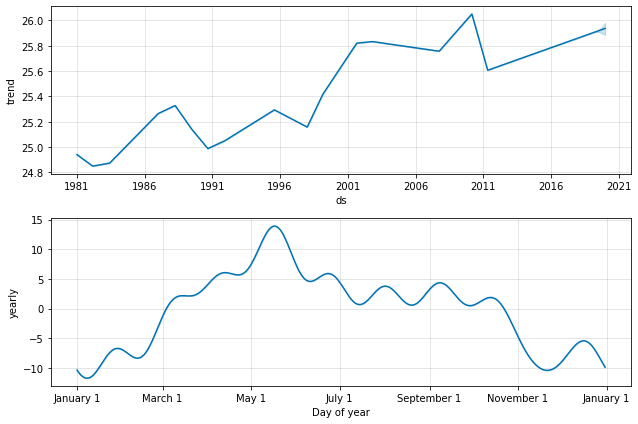

In [62]:
fig2 = model.plot_components(forecast)

In [63]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (840, 1)
20.752535716801418


C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mid_temp,Month,yhat
0,14.55,1,19.156867
1,14.15,1,19.156867
2,14.25,1,19.156867
3,13.80,1,19.156867
4,16.10,1,19.156867
...,...,...,...
835,14.60,12,16.266595
836,13.20,12,16.266595
837,6.15,12,16.266595
838,15.50,12,16.266595


In [64]:
import matplotlib.pyplot as plt

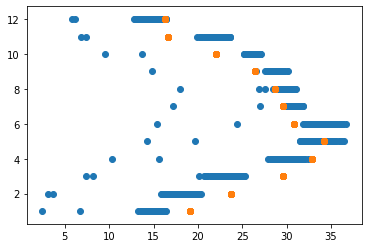

In [65]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()